## Imports

In [1]:
import pandas as pd
import numpy as np

## Data Ingestion

In [2]:
pc_df = pd.read_csv("data/laptops_train.csv")
pc_df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


## Data Cleaning Part I: Transformation

In [3]:
# remove spaces in colum names
pc_df.columns = ["_".join(pc.lower().split()) for pc in pc_df.columns]

# rename columns with operating system info for brevity
pc_df = pc_df.rename(columns={"operating_system":"os", "operating_system_version":"os_version"})

In [4]:
pc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  977 non-null    object 
 1   model_name    977 non-null    object 
 2   category      977 non-null    object 
 3   screen_size   977 non-null    object 
 4   screen        977 non-null    object 
 5   cpu           977 non-null    object 
 6   ram           977 non-null    object 
 7   storage       977 non-null    object 
 8   gpu           977 non-null    object 
 9   os            977 non-null    object 
 10  os_version    841 non-null    object 
 11  weight        977 non-null    object 
 12  price         977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [5]:
# drop columns with null values
pc_df = pc_df.dropna()

In [6]:
pc_df.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00
13,Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows,10,2.2kg,4436218.80


In [7]:
# create df with some of original info for later reference
pc_info_df = pc_df[[x for x in pc_df.columns if x not in ["os", "os_version", "weight", "price"]]]

In [8]:
pc_info_df.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620
13,Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430


In [9]:
# convert manufacturer to boolean variable
man_df = pd.get_dummies(pc_df.manufacturer)

# remove spaces in column names and indicate category
man_df.columns = ["_".join(x.lower().split())+"_manufac" for x in man_df.columns]

# add boolean category variables to pc_df
pc_df = pc_df.merge(man_df, left_index=True, right_index=True)
pc_df = pc_df.drop(columns=["manufacturer"])

In [10]:
# drop model name column
pc_df = pc_df.drop(columns=["model_name"])

In [11]:
# convert category to boolean variable
cat_df = pd.get_dummies(pc_df.category)

# remove spaces in column names and indicate category
cat_df.columns = ["_".join(cat.lower().split())+"_cat" for cat in cat_df.columns]

# add boolean category variables to pc_df
pc_df = pc_df.merge(cat_df, left_index=True, right_index=True)
pc_df = pc_df.drop(columns=["category"])

In [12]:
# extract screen size with regex and create new column
regex = r"(.*)\""
pc_df["screen_size_in"] = pc_df.screen_size.str.extract(regex, expand=False)
pc_df["screen_size_in"] = pc_df["screen_size_in"].str.strip()

# convert datatype to float
pc_df["screen_size_in"] = pc_df["screen_size_in"].apply(float)

# drop extra column
pc_df = pc_df.drop(columns=["screen_size"])

In [13]:
# create screen_wid column
regex = r"\s(\d*)x"
pc_df["res_wid"] = pc_df.screen.str.extract(regex, expand=False)
pc_df["res_wid"] = pc_df["res_wid"].str.strip()

# convert datatype to float
pc_df["res_wid"] = pc_df["res_wid"].apply(float)

# create screen_len column
regex = r"x(\d*)"
pc_df["res_len"] = pc_df.screen.str.extract(regex, expand=False)
pc_df["res_len"] = pc_df["res_len"].str.strip()

# convert to float
pc_df["res_len"] = pc_df["res_len"].apply(float)

# drop extra column
pc_df = pc_df.drop(columns=["screen"])

In [14]:
# extract brand name from CPU name
def get_brand(cpu):
   return cpu.split()[0]  
cpu_df = pc_df.cpu.apply(get_brand)

# convert cpu to boolean variable (brand only)
cpu_df = pd.get_dummies(cpu_df)

# edit column names to indicate CPU
cpu_df.columns = [x.lower()+"_cpu" for x in cpu_df]

# add boolean category variables to pc_df
pc_df = pc_df.merge(cpu_df, left_index=True, right_index=True)

# create column for clock speed only with regex
regex = r"(\S{1,3})GHz"
pc_df["cpu_clock_spd_GHz"] = pc_df.cpu.str.extract(regex, expand=False)
pc_df["cpu_clock_spd_GHz"] = pc_df["cpu_clock_spd_GHz"].str.strip()

# convert datatype to float
pc_df["cpu_clock_spd_GHz"] = pc_df["cpu_clock_spd_GHz"].apply(float)

# drop extra column
# pc_df = pc_df.drop(columns=["cpu"])

In [15]:
# extract RAM in GB and convert to int
regex = r"(\d*)GB"
pc_df.ram = pc_df.ram.str.extract(regex, expand=False)
pc_df.ram = pc_df.ram.str.strip()
pc_df.ram = pc_df.ram.apply(int)

# rename column to include unit (GB)
pc_df = pc_df.rename(columns={"ram":"ram_gb"})

___Note: storage column contains a lot of diverse formatting and will have to be revisited.___

In [16]:
# # extract storage in GB and convert to int
# regex = r"(\d*)GB"
# pc_df.storage = pc_df.storage.str.extract(regex, expand=False)
# pc_df.storage = pc_df.storage.str.strip()
# pc_df.storage = pc_df.storage.apply(int)

# # rename column to include unit (GB)
# pc_df = pc_df.rename(columns={"storage":"storage_gb"})

# drop storage column
pc_df = pc_df.drop(columns=["storage"])

In [17]:
# extract brand name from GPU name
def get_brand(gpu):
   return gpu.split()[0]  
gpu_df = pc_df.gpu.apply(get_brand)

# convert gpu to boolean variable (brand only)
gpu_df = pd.get_dummies(gpu_df)

# edit column names to indicate GPU
gpu_df.columns = [x.lower()+"_gpu" for x in gpu_df]

# add boolean category variables to pc_df
pc_df = pc_df.merge(gpu_df, left_index=True, right_index=True)
# pc_df = pc_df.drop(columns=["gpu"])

In [18]:
# clean os column (resolve similarity in "Mac OS" and "macOS" values)
def clean_macOS(row):
    if row == "Mac OS" or row == "macOS" :
        return "Mac"
    elif row == "No OS":
        return "None"
    else:
        return row

pc_df.os = pc_df.os.apply(clean_macOS)

# convert os to boolean variable
os_df = pd.get_dummies(pc_df.os)

# remove spaces in column names and indicate category
os_df.columns = ["_".join(x.lower().split())+"_manufac" for x in os_df.columns]

# add boolean category variables to pc_df
pc_df = pc_df.merge(os_df, left_index=True, right_index=True)
pc_df = pc_df.drop(columns=["os"])

In [19]:
# drop os_version column
pc_df = pc_df.drop(columns=["os_version"])

In [20]:
# extract weight in kg and convert to float
regex = r"(\d*)kg"
pc_df.weight = pc_df.weight.str.extract(regex, expand=False)
pc_df.weight = pc_df.weight.str.strip()
pc_df.weight = pc_df.weight.apply(float)

# rename column to include unit (kg)
pc_df = pc_df.rename(columns={"weight":"weight_kg"})

In [21]:
# convert price column from INR (rupees) to USD (dollars)
#     1 INR = 0.012 USD now according to Google Finance and Forbes
pc_df.price = pc_df.price*0.012*0.012

# rename price column to include unit (usd)
pc_df = pc_df.rename(columns={"price":"price_usd"})

In [22]:
pc_df.head()

,cpu,ram_gb,gpu,weight_kg,price_usd,acer_manufac,apple_manufac,asus_manufac,chuwi_manufac,dell_manufac,...,res_wid,res_len,amd_cpu,intel_cpu,cpu_clock_spd_GHz,amd_gpu,intel_gpu,nvidia_gpu,mac_manufac,windows_manufac
5,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,1.0,512.179200,True,False,False,False,False,...,NaN,768.0,True,False,3.0,True,False,False,False,True
6,Intel Core i7 2.2GHz,16,Intel Iris Pro Graphics,4.0,2740.120307,False,True,False,False,False,...,2880.0,1800.0,False,True,2.2,False,True,False,True,False
8,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,3.0,1914.269760,False,False,True,False,False,...,1920.0,1080.0,False,True,1.8,False,False,True,False,True
9,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,6.0,985.944960,True,False,False,False,False,...,1920.0,1080.0,False,True,1.6,False,True,False,False,True
13,Intel Core i3 6006U 2GHz,4,AMD Radeon R5 M430,2.0,638.815507,False,False,False,False,True,...,1920.0,1080.0,False,True,2.0,True,False,False,False,True


## Data Cleaning Part II: Min-Max Normalization

In [23]:
pc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 5 to 976
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cpu                     841 non-null    object 
 1   ram_gb                  841 non-null    int64  
 2   gpu                     841 non-null    object 
 3   weight_kg               841 non-null    float64
 4   price_usd               841 non-null    float64
 5   acer_manufac            841 non-null    bool   
 6   apple_manufac           841 non-null    bool   
 7   asus_manufac            841 non-null    bool   
 8   chuwi_manufac           841 non-null    bool   
 9   dell_manufac            841 non-null    bool   
 10  fujitsu_manufac         841 non-null    bool   
 11  hp_manufac              841 non-null    bool   
 12  huawei_manufac          841 non-null    bool   
 13  lg_manufac              841 non-null    bool   
 14  lenovo_manufac          841 non-null    bool   

In [24]:
pc_df.describe()

,ram_gb,weight_kg,price_usd,screen_size_in,res_wid,res_len,cpu_clock_spd_GHz
count,841.000000,841.000000,841.000000,841.000000,682.000000,841.000000,841.000000
mean,8.851367,27.881094,1527.259605,15.070987,2052.281525,1090.116528,2.301023
std,5.165640,45.120686,918.841233,1.403614,483.718917,288.431804,0.540768
min,2.000000,0.000000,245.717971,11.300000,1366.000000,768.000000,0.440000
25%,4.000000,3.000000,856.619712,14.000000,1920.000000,1080.000000,1.800000
50%,8.000000,9.000000,1320.141888,15.600000,1920.000000,1080.000000,2.500000
75%,8.000000,42.000000,1983.413952,15.600000,1920.000000,1080.000000,2.700000
max,32.000000,920.000000,7809.452352,18.400000,3840.000000,2160.000000,3.600000


<Axes: >

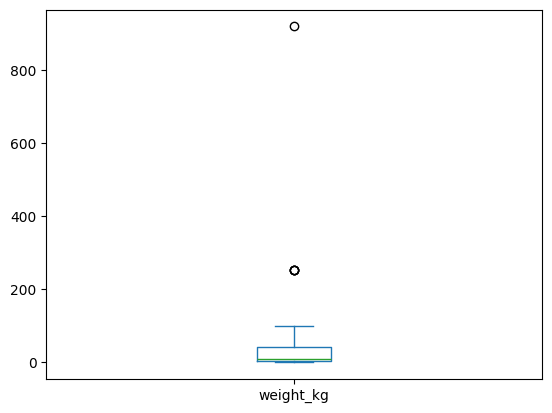

In [25]:
pc_df.weight_kg.plot.box()

In [26]:
# columns to be normalized: ram_gb, price_usd, screen_wid, screen_len, 